In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
import numpy as np

/Users/junaluzi/opt/anaconda3/envs/math-652/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
%matplotlib inline

In [3]:
datadir = Path(".").resolve().parent / "data"
gamelogdir = datadir / "gamelog" / "clean"
playerdir = datadir / "players" / "clean"
salarydir = datadir / "salary" / "clean"

PCA can be used to identify the most important factors that contribute to a player's or team's performance.

## <span style="color:orange">Player Performance</span>

**Goal**: Identify the most important performance variables, using performance data.

List of average season variables that we used for PCA to perform player performance analysis:
- minutes played `mean_min_played`
- field goals made `mean_field_goals`
- three-point shots made `mean_field_goals_3pt`
- free throws made `mean_free_throws`
- field goal attempts `mean_field_goals_attempts`
- three-point shot attempts `mean_field_goals_attempt_3pt`
- free throw attempts `mean_free_throws_attempts`
- offensive rebounds `mean_offensive_rebounds`
- defensive rebounds `mean_defensive_rebounds`
- assists `mean_assists`
- steals `mean_steals`
- blocks `mean_blocks`
- turnovers `mean_turnovers`
- personal fouls `mean_personal_fouls`
- points scored `mean_points`

In [4]:
player_df = pd.read_csv(datadir / "season_mean_player_stats.csv")
player_df.head()

,player_id,season,position,position_name,height,weight,total_games,games_started,total_salary,mean_salary,...,mean_offensive_rebounds,mean_defensive_rebounds,mean_total_rebounds,mean_assists,mean_steals,mean_blocks,mean_turnovers,mean_personal_fouls,mean_points,game_started_share
0,abdelal01,1991.0,F-C,forward-center,82.0,240.0,43,0.0,21242000.0,494000.0,...,0.627907,1.441860,2.069767,0.279070,0.093023,0.279070,0.511628,0.906977,3.139535,0.0
1,abdelal01,1992.0,F-C,forward-center,82.0,240.0,71,0.0,35500000.0,500000.0,...,1.140845,2.521127,3.661972,0.422535,0.352113,0.239437,0.929577,1.859155,6.084507,0.0
2,abdelal01,1993.0,F-C,forward-center,82.0,240.0,75,0.0,60375000.0,805000.0,...,1.680000,2.813333,4.493333,0.360000,0.333333,0.346667,1.293333,2.520000,7.706667,0.0
3,abdelal01,1994.0,F-C,forward-center,82.0,240.0,13,0.0,8450000.0,650000.0,...,0.923077,2.615385,3.538462,0.230769,0.153846,0.230769,1.307692,1.538462,4.923077,0.0
4,abdelal01,1995.0,F-C,forward-center,82.0,240.0,54,0.0,0.0,NaN,...,0.685185,1.425926,2.111111,0.240741,0.277778,0.222222,0.833333,1.925926,4.740741,0.0


In [5]:
# drop any nans
player_df = player_df.dropna()

In [6]:
player_headers = [
    "mean_min_played",
    "mean_field_goals",
    "mean_field_goals_3pt",
    "mean_free_throws",
    "mean_field_goals_attempts",
    "mean_field_goals_attempt_3pt",
    "mean_free_throws_attempts",
    "mean_offensive_rebounds",
    "mean_defensive_rebounds",
    "mean_assists",
    "mean_steals",
    "mean_blocks",
    "mean_turnovers",
    "mean_personal_fouls",
    "mean_points",
    # "game_started_share"
]
player_headers_abbrev = [
    "MP", "FG", "FG3P", "FT", "FGA", 
    "FGA3P", "FTA", "ORB", "DRB", "AST", 
    "STL", "BLK", "TOV", "PF", "PTS"
]
player_df[["player_id", "season"] + player_headers].head()

,player_id,season,mean_min_played,mean_field_goals,mean_field_goals_3pt,mean_free_throws,mean_field_goals_attempts,mean_field_goals_attempt_3pt,mean_free_throws_attempts,mean_offensive_rebounds,mean_defensive_rebounds,mean_assists,mean_steals,mean_blocks,mean_turnovers,mean_personal_fouls,mean_points
2,abdelal01,1993.0,17.480000,3.266667,0.000000,1.173333,6.306667,0.013333,1.546667,1.680000,2.813333,0.360000,0.333333,0.346667,1.293333,2.520000,7.706667
19,abdulka01,1984.0,32.775000,8.950000,0.000000,3.562500,15.475000,0.012500,4.925000,2.112500,5.225000,2.637500,0.687500,1.787500,2.762500,2.637500,21.462500
20,abdulka01,1985.0,33.291139,9.151899,0.000000,3.658228,15.278481,0.012658,5.000000,2.063291,5.810127,3.139241,0.772152,2.050633,2.506329,3.025316,21.962025
22,abdulka01,1987.0,31.294872,7.179487,0.012821,3.141026,12.730769,0.038462,4.397436,1.948718,4.756410,2.602564,0.628205,1.243590,2.384615,3.141026,17.512821
23,abdulka01,1988.0,28.850000,6.000000,0.000000,2.562500,11.287500,0.012500,3.362500,1.475000,4.500000,1.687500,0.600000,1.150000,1.987500,2.700000,14.562500


We run PCA for each season because running PCA on the full dataset may not account for variations that occur season-to-season and may result in less meaningful principal components. Running PCA for each season separately will help capture the variability within each season and provide a more accurate representation of the data. Moreover, we compare the results of PCA across different seasons to identify any trends or changes in player performance. We do this by comparing the principal components (PCs) that explain the majority of the variance in each season. We plot the loadings of the top PCs for each season on the same graph. The loadings represent the correlation between each original variable and the corresponding PC. By comparing the loadings across different seasons, we see which variables have the most influence on player performance and how their importance may have changed over time.

Because the player specific variable scales vary, it is generally better to use the correlation matrix as input to our PCA model. This is because the correlation matrix is normalized and gives equal importance to all variables regardless of their scales or variances.

A description of the data and varying scales is shown below.

In [7]:
player_df[player_headers].describe()

,mean_min_played,mean_field_goals,mean_field_goals_3pt,mean_free_throws,mean_field_goals_attempts,mean_field_goals_attempt_3pt,mean_free_throws_attempts,mean_offensive_rebounds,mean_defensive_rebounds,mean_assists,mean_steals,mean_blocks,mean_turnovers,mean_personal_fouls,mean_points
count,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000,11362.000000
mean,23.643138,3.798181,0.630540,1.886282,8.340748,1.790930,2.475401,1.101279,2.926726,2.320703,0.790872,0.451311,1.436134,2.082883,10.113184
std,9.244654,2.244304,0.703024,1.508824,4.650352,1.837489,1.891737,0.872420,1.812076,1.994320,0.470828,0.505019,0.823680,0.767972,6.076334
min,2.000000,0.000000,0.000000,0.000000,0.500000,0.012048,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,16.335221,2.023955,0.029412,0.781250,4.625893,0.172899,1.078202,0.447368,1.625000,0.915786,0.448980,0.136364,0.804878,1.542494,5.307692
50%,23.899856,3.365854,0.381818,1.441176,7.500000,1.229619,1.939024,0.833333,2.528175,1.707317,0.705128,0.283951,1.276316,2.071429,8.902439
75%,31.471748,5.207673,1.048780,2.567818,11.362455,2.938272,3.351176,1.534195,3.787292,3.075568,1.034936,0.571429,1.925926,2.612169,13.809518
max,43.736944,13.390244,5.349206,10.291139,27.816667,13.179487,13.135135,6.815385,12.338710,14.538462,3.658537,4.585366,5.728395,5.000000,37.085366


Next, we'll look at the numbers of players in each season. Because non-missing season data from 1980-1983 are small, we start the PCA analysis in 1984-2021 (total of 38 seasons).

<BarContainer object of 42 artists>

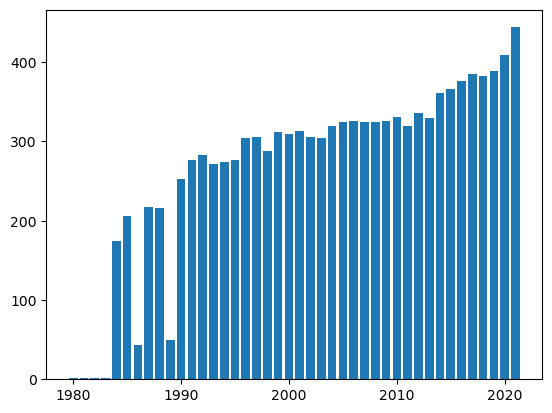

In [8]:
x = [name for name, _ in player_df.groupby("season")]
y = [group.shape[0] for _, group in player_df.groupby("season")]
plt.bar(x, y)

In [9]:
# keep seasons >= 1984
player_df = player_df[player_df.season >= 1984]

#### <span style="color:pink">Principal Component Factor Analysis of R (w/out rotation)</span>

In [10]:
dump_img = Path(".").resolve() / "images"
dump_img.mkdir(parents=True, exist_ok=True)

In [11]:
for season, group in player_df.groupby("season"):
    # compute correlation matrix
    corr_matrix = group[player_headers].corr()
    corr_fpath = dump_img / "corrmat_plots"
    scree_fpath = dump_img / "scree_plots"
    corr_fpath.mkdir(parents=True, exist_ok=True)
    scree_fpath.mkdir(parents=True, exist_ok=True)
    # store corrmat
    f = plt.figure(figsize=(8, 6))
    cmap = plt.get_cmap("coolwarm")
    plt.matshow(corr_matrix, fignum=f.number, vmin=-1, vmax=1, cmap=cmap)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=6, rotation=90)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=6)
    plt.title(f"Correlation Matrix, {int(season)}", fontsize=10)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=8)
    plt.savefig(corr_fpath / f"corrmat_{int(season)}.png", dpi=300, bbox_inches="tight")
    plt.close()
    # store scree plot
    eig_vals, eig_vecs = np.linalg.eig(corr_matrix)
    fig, ax = plt.subplots()
    ax.plot(np.arange(1, len(eig_vals) + 1), eig_vals)
    ax.set_xlabel("Principal Component Number")
    ax.set_ylabel("Variance")
    ax.set_title(f"Scree Plot, {int(season)}")
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.savefig(scree_fpath / f"scree_{int(season)}.png", dpi=300, bbox_inches="tight")
    plt.close()

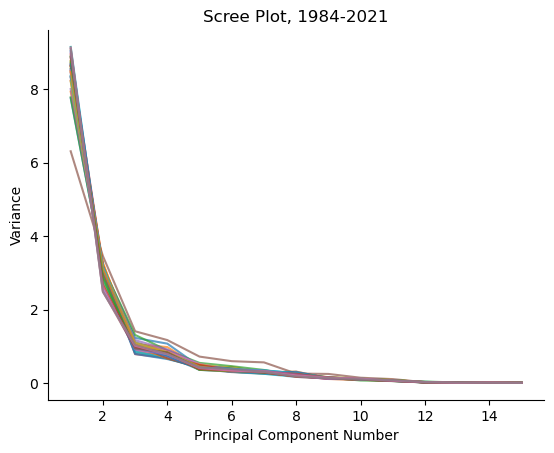

In [12]:
# Plot all scree plots in one chart
fig, ax = plt.subplots()
for season, group in player_df.groupby("season"):
    corr_matrix = group[player_headers].corr()
    eig_vals, eig_vecs = np.linalg.eig(corr_matrix)
    plt.plot(np.arange(1, len(eig_vals) + 1), eig_vals, alpha=0.7)
ax.set_xlabel("Principal Component Number")
ax.set_ylabel("Variance")
ax.set_title(f"Scree Plot, {int(min(player_df.season.unique()))}-{int(max(player_df.season.unique()))}")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.savefig(scree_fpath / f"all_scree_plots.png", dpi=300, bbox_inches="tight")

In [13]:
optimal_factor_no = 3

pc_array = []
for season, group in player_df.groupby("season"):
    # compute correlation matrix
    corr_matrix = group[player_headers].corr()
    eig_vals, eig_vecs = np.linalg.eig(corr_matrix)
    factor_dict = {}
    total_var = 0
    # standardize data
    scaler = StandardScaler()
    X = group[player_headers]
    X_std = scaler.fit_transform(X)

    factor_dict["season"] = int(season)
    for i in range(optimal_factor_no):
        factor_dict[f"factor_{i}"] = np.sqrt(eig_vals[i]) * eig_vecs[:, i]
        factor_dict[f"var_{i}"] = eig_vals[i] / sum(eig_vals)
        total_var += eig_vals[i] / sum(eig_vals)
        # compute scores
        factor_dict[f"scores_{i}"] = X_std @ eig_vecs[:, i]        
    factor_dict["total_var"] = total_var
    pc_array.append(factor_dict)

In [14]:
pc_df = pd.DataFrame(pc_array)
pc_df.head()

,season,factor_0,var_0,scores_0,factor_1,var_1,scores_1,factor_2,var_2,scores_2,total_var
0,1984,"[-0.939012217821928, -0.9243404138344008, -0.1...",0.517228,"[-3.073415497704959, 0.8038653028486438, -5.74...","[-0.0747723627967182, -0.11479230380957323, -0...",0.210848,"[1.759034180554285, 0.5210235857480922, -1.549...","[0.01750719029937957, -0.11073113809706854, 0....",0.081775,"[0.12142589673909886, -0.15878970555145677, -0...",0.809852
1,1985,"[-0.9323524146235892, -0.9252547885967752, -0....",0.528982,"[-3.6440109777766376, -4.859795982061797, -0.7...","[-0.07777776703275674, -0.11126149031948976, -...",0.216465,"[2.299481053981631, -1.0380108639033674, -1.83...","[0.059818654473089206, 0.016826628987258622, -...",0.070655,"[-0.5852477296856559, -1.0344347977860455, 0.2...",0.816102
2,1986,"[-0.8779194442155838, -0.9605649770498174, -0....",0.518738,"[-0.7239648218064415, 0.2573889980193427, 2.94...","[0.09460390233921352, -0.0379194135976466, -0....",0.209980,"[-2.075139490816698, 2.2268778503826927, 0.626...","[0.22316639787970732, -0.08489325932238882, -0...",0.087194,"[1.7239067168510853, -0.10714819627953218, -0....",0.815912
3,1987,"[0.9416500826361554, 0.9351744671954098, 0.235...",0.548890,"[2.2637215332367084, 0.21947922501858974, -1.4...","[0.032134235372627086, 0.08448944565905071, 0....",0.205198,"[-1.6233857633089364, -0.75966483142866, 2.485...","[0.03163396629221886, -0.06192451840462458, 0....",0.072198,"[-0.01916996353921871, -0.3367839178309649, 0....",0.826286
4,1988,"[0.9386697692835835, 0.9314496104256829, 0.187...",0.533726,"[0.9988295884846189, 1.4558090147928378, 4.788...","[0.08042558882618765, 0.14269079360073708, 0.7...",0.208724,"[-1.4271191170036535, 6.667869451400313, 1.651...","[0.027983738684486045, -0.029991604776144563, ...",0.077783,"[-0.13304385283023765, -3.441754463184208, -1....",0.820233


In [34]:
# store scores locally
pc_df.iloc[0].scores_0.shape #175
scores0, scores1, scores2 = [], [], []
for _, row in pc_df.iterrows():
    scores0.extend(row.scores_0)
    scores1.extend(row.scores_1)
    scores2.extend(row.scores_2)
player_df = player_df.assign(
    scores_pc1=scores0,
    scores_pc2=scores1,
    scores_pc3=scores2,
)
player_df.to_csv(datadir / "season_mean_player_stats.csv", index=False)

In [15]:
biplot_fpath = dump_img / "biplot"
biplot_fpath.mkdir(parents=True, exist_ok=True)
for i, row in pc_df.iterrows():
    season = row.season
    # Plot biplot
    fig, ax = plt.subplots(figsize=(8,8))
    arrow_scale = 7
    ax.scatter(row.scores_0, row.scores_1, color='k', alpha=0.2)
    for i, (x,y) in enumerate(zip(row.factor_0, row.factor_1)):
        plt.arrow(0, 0, x*arrow_scale, y*arrow_scale, color="r", alpha=0.5, head_width=0.2, head_length=0.2)
        plt.text(x*arrow_scale * 1.1, y*arrow_scale * 1.1, player_headers_abbrev[i], 
            color="r", ha="center", va="center", fontsize=8, fontweight="bold"
        )
    ax.set_xlabel("Principal Component 1", fontsize=14)
    ax.set_ylabel("Principal Component 2", fontsize=14)
    ax.set_title(f"Biplot, {season}", fontsize=16)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    ax.axvline(x=0, color='grey', linestyle='--')
    ax.axhline(y=0, color='grey', linestyle='--')
    plt.savefig(biplot_fpath / f"biplot_pc_12_{season}.png", dpi=300, bbox_inches="tight")
    plt.close()

for i, row in pc_df.iterrows():
    season = row.season
    # Plot biplot
    fig, ax = plt.subplots(figsize=(8,8))
    arrow_scale = 7
    ax.scatter(row.scores_0, row.scores_2, color='k', alpha=0.2)
    for i, (x,y) in enumerate(zip(row.factor_0, row.factor_2)):
        plt.arrow(0, 0, x*arrow_scale, y*arrow_scale, color="r", alpha=0.5, head_width=0.2, head_length=0.2)
        plt.text(x*arrow_scale * 1.1, y*arrow_scale * 1.1, player_headers_abbrev[i], 
            color="r", ha="center", va="center", fontsize=8, fontweight="bold"
        )
    ax.set_xlabel("Principal Component 1", fontsize=14)
    ax.set_ylabel("Principal Component 3", fontsize=14)
    ax.set_title(f"Biplot, {season}", fontsize=16)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    ax.axvline(x=0, color='grey', linestyle='--')
    ax.axhline(y=0, color='grey', linestyle='--')
    plt.savefig(biplot_fpath / f"biplot_pc_13_{season}.png", dpi=300, bbox_inches="tight")
    plt.close()


for i, row in pc_df.iterrows():
    season = row.season
    # Plot biplot
    fig, ax = plt.subplots(figsize=(8,8))
    arrow_scale = 7
    ax.scatter(row.scores_1, row.scores_2, color='k', alpha=0.2)
    for i, (x,y) in enumerate(zip(row.factor_1, row.factor_2)):
        plt.arrow(0, 0, x*arrow_scale, y*arrow_scale, color="r", alpha=0.5, head_width=0.2, head_length=0.2)
        plt.text(x*arrow_scale * 1.1, y*arrow_scale * 1.1, player_headers_abbrev[i], 
            color="r", ha="center", va="center", fontsize=8, fontweight="bold"
        )
    ax.set_xlabel("Principal Component 2", fontsize=14)
    ax.set_ylabel("Principal Component 3", fontsize=14)
    ax.set_title(f"Biplot, {season}", fontsize=16)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    ax.axvline(x=0, color='grey', linestyle='--')
    ax.axhline(y=0, color='grey', linestyle='--')
    plt.savefig(biplot_fpath / f"biplot_pc_23_{season}.png", dpi=300, bbox_inches="tight")
    plt.close()

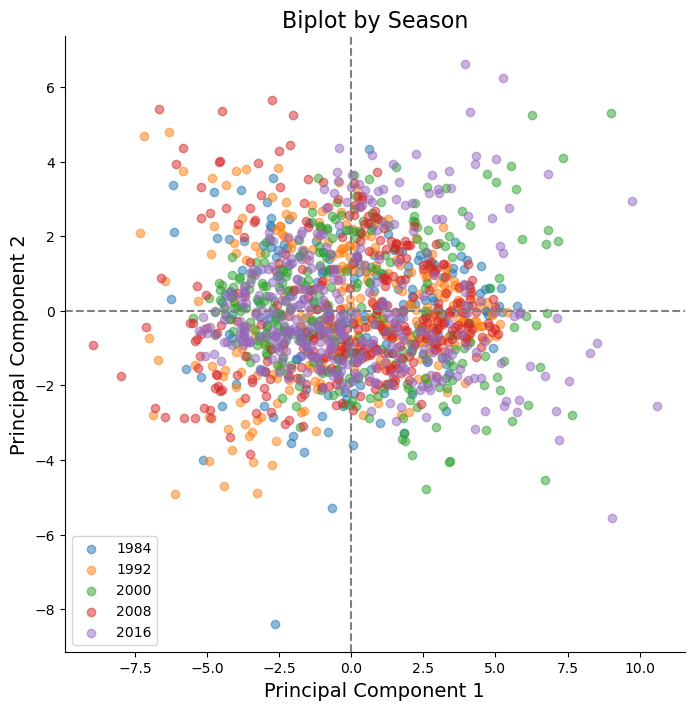

In [26]:
overlap_df = pc_df[pc_df.season.isin(list(range(1984, 2021, 8)))]

fig, ax = plt.subplots(figsize=(8,8))
for i, row in overlap_df.iterrows():
    season = row.season
    ax.scatter(row.scores_0, row.scores_1, alpha=0.5, label=str(season))
 
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 2", fontsize=14)
ax.set_title(f"Biplot by Season", fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.axvline(x=0, color='grey', linestyle='--')
ax.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

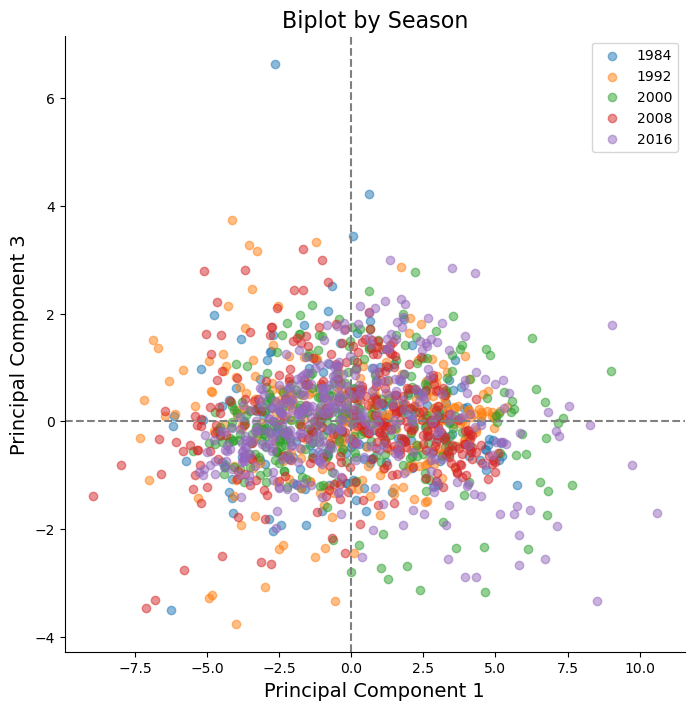

In [50]:
overlap_df = pc_df[pc_df.season.isin(list(range(1984, 2021, 8)))]

fig, ax = plt.subplots(figsize=(8,8))
for i, row in overlap_df.iterrows():
    season = row.season
    ax.scatter(row.scores_0, row.scores_2, alpha=0.5, label=str(season))
 
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 3", fontsize=14)
ax.set_title(f"Biplot by Season", fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.axvline(x=0, color='grey', linestyle='--')
ax.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

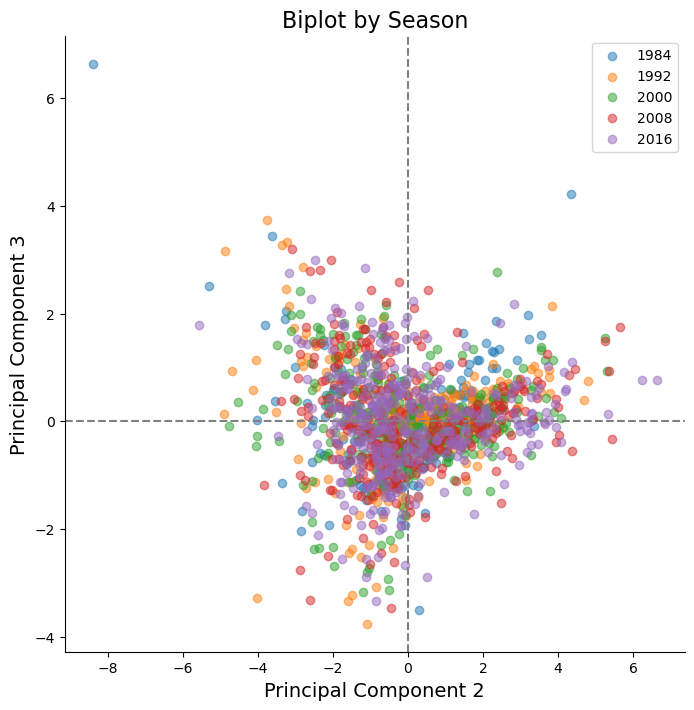

In [51]:
overlap_df = pc_df[pc_df.season.isin(list(range(1984, 2021, 8)))]

fig, ax = plt.subplots(figsize=(8,8))
for i, row in overlap_df.iterrows():
    season = row.season
    ax.scatter(row.scores_1, row.scores_2, alpha=0.5, label=str(season))
 
ax.set_xlabel("Principal Component 2", fontsize=14)
ax.set_ylabel("Principal Component 3", fontsize=14)
ax.set_title(f"Biplot by Season", fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.axvline(x=0, color='grey', linestyle='--')
ax.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

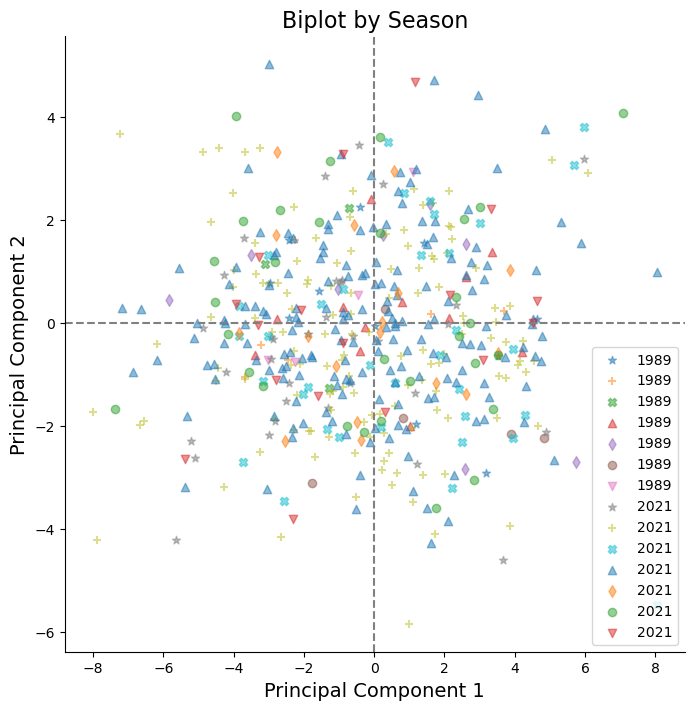

In [49]:
overlap_df = player_df[player_df.season.isin([1989, 2021])]
map_markers = {'forward-center': "*", 'center': "o", 'guard': "^", 'forward': "+", 'guard-forward': "X",
       'center-forward':"d", 'forward-guard': "v"}
overlap_df = overlap_df.assign(markers=overlap_df.position_name.map(map_markers))

fig, ax = plt.subplots(figsize=(8,8))
for (season, marker), group in overlap_df.groupby(["season", "markers"]):
    season = int(season)
    ax.scatter(group.scores_pc1, group.scores_pc2, alpha=0.5, label=str(season), marker=marker)
 
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 2", fontsize=14)
ax.set_title(f"Biplot by Season", fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.axvline(x=0, color='grey', linestyle='--')
ax.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

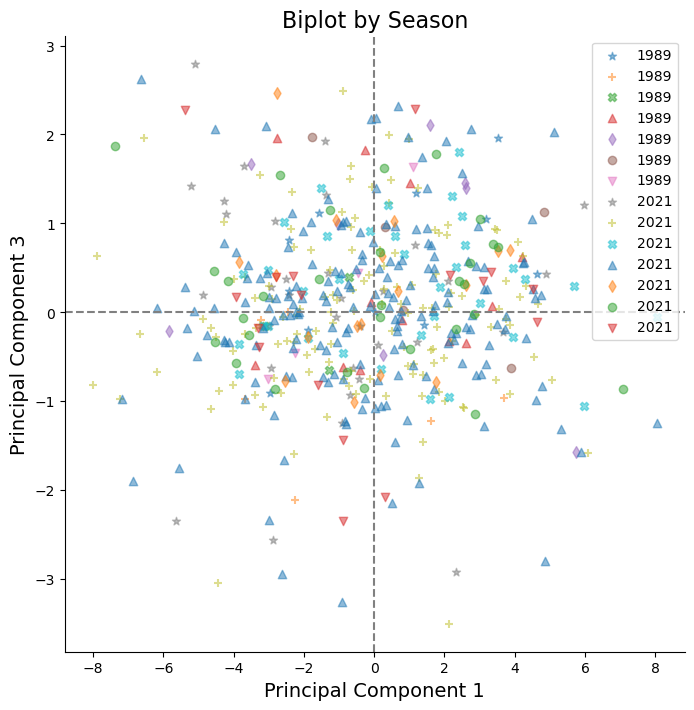

In [52]:
overlap_df = player_df[player_df.season.isin([1989, 2021])]
map_markers = {'forward-center': "*", 'center': "o", 'guard': "^", 'forward': "+", 'guard-forward': "X",
       'center-forward':"d", 'forward-guard': "v"}
overlap_df = overlap_df.assign(markers=overlap_df.position_name.map(map_markers))

fig, ax = plt.subplots(figsize=(8,8))
for (season, marker), group in overlap_df.groupby(["season", "markers"]):
    season = int(season)
    ax.scatter(group.scores_pc1, group.scores_pc3, alpha=0.5, label=str(season), marker=marker)
 
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 3", fontsize=14)
ax.set_title(f"Biplot by Season", fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.axvline(x=0, color='grey', linestyle='--')
ax.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

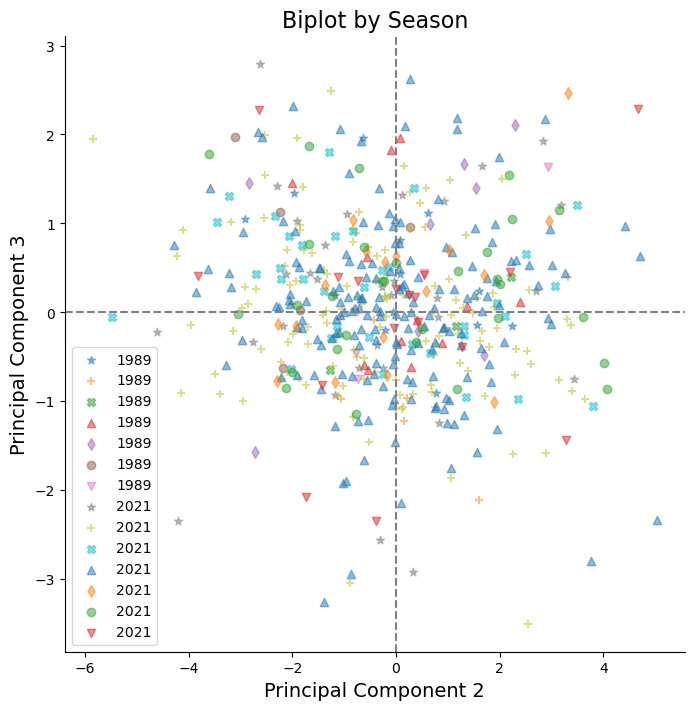

In [53]:
overlap_df = player_df[player_df.season.isin([1989, 2021])]
map_markers = {'forward-center': "*", 'center': "o", 'guard': "^", 'forward': "+", 'guard-forward': "X",
       'center-forward':"d", 'forward-guard': "v"}
overlap_df = overlap_df.assign(markers=overlap_df.position_name.map(map_markers))

fig, ax = plt.subplots(figsize=(8,8))
for (season, marker), group in overlap_df.groupby(["season", "markers"]):
    season = int(season)
    ax.scatter(group.scores_pc2, group.scores_pc3, alpha=0.5, label=str(season), marker=marker)
 
ax.set_xlabel("Principal Component 2", fontsize=14)
ax.set_ylabel("Principal Component 3", fontsize=14)
ax.set_title(f"Biplot by Season", fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
ax.axvline(x=0, color='grey', linestyle='--')
ax.axhline(y=0, color='grey', linestyle='--')
plt.legend()
plt.show()

In [17]:
pcatbl_fpath = Path(".").resolve() / "pca_results"
pcatbl_fpath.mkdir(parents=True, exist_ok=True)
pca_dfs = []
for i, row in pc_df.iterrows():
    tbl = pd.DataFrame(
        data={
            "season": row.season, 
            "variable": player_headers, 
            "variable_abbrev": player_headers_abbrev, 
            "factor_1": row.factor_0, 
            "factor_2": row.factor_1, 
            "factor_3": row.factor_2,
            "variation_1": row.var_0,
            "variation_2": row.var_1,
            "variation_3": row.var_2,
            "total_variation": row.total_var,
        }
    )
    pca_dfs.append(tbl)
pca_df = pd.concat(pca_dfs)
pca_df.to_csv(pcatbl_fpath / "pca_results.csv", index=False)

In [18]:
pca_df.head()

,season,variable,variable_abbrev,factor_1,factor_2,factor_3,variation_1,variation_2,variation_3,total_variation
0,1984,mean_min_played,MP,-0.939012,-0.074772,0.017507,0.517228,0.210848,0.081775,0.809852
1,1984,mean_field_goals,FG,-0.924340,-0.114792,-0.110731,0.517228,0.210848,0.081775,0.809852
2,1984,mean_field_goals_3pt,FG3P,-0.136472,-0.779396,0.528186,0.517228,0.210848,0.081775,0.809852
3,1984,mean_free_throws,FT,-0.882485,0.078944,-0.266144,0.517228,0.210848,0.081775,0.809852
4,1984,mean_field_goals_attempts,FGA,-0.908815,-0.187784,-0.112673,0.517228,0.210848,0.081775,0.809852


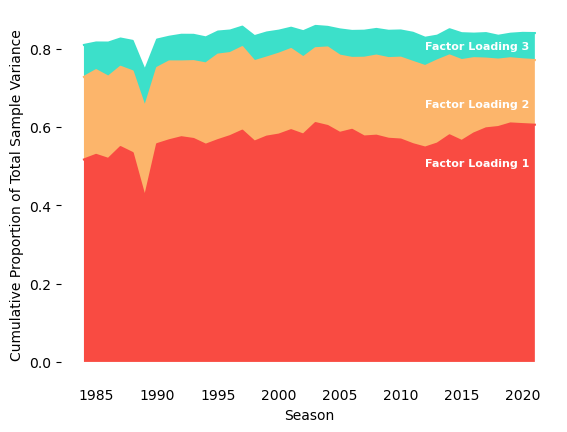

In [19]:
var_df = pca_df[["season", "variation_1", "variation_2", 'variation_3', "total_variation"]].drop_duplicates()

pcares_fpath = dump_img / "pca_results"
pcares_fpath.mkdir(parents=True, exist_ok=True)

# Plot cumulative trend lines
plt.plot(var_df.season, var_df.variation_1, label="Factor Loading 1", color="#f94b42")
plt.plot(var_df.season, var_df.variation_1+var_df.variation_2, label="Factor Loading 2", color="#fcb56b")
plt.plot(var_df.season, var_df.variation_1+var_df.variation_2+var_df.variation_3, label="Factor Loading 3", color="#3ce0ca")
plt.fill(np.append(var_df.season, var_df.season[::-1]), np.append(np.zeros(var_df.shape[0]), var_df.variation_1[::-1]), '#f94b42')

plt.fill(np.append(var_df.season, var_df.season[::-1]), np.append(var_df.variation_1, (var_df.variation_2+var_df.variation_1)[::-1]), '#fcb56b')
plt.fill(np.append(var_df.season, var_df.season[::-1]), np.append((var_df.variation_2+var_df.variation_1), var_df.total_variation[::-1]), '#3ce0ca')
plt.xlabel("Season")
plt.ylabel("Cumulative Proportion of Total Sample Variance")
plt.tick_params(bottom = False)
plt.box(False) #remove box
plt.text(2012, 0.5, 'Factor Loading 1', fontsize=8, color="white", fontweight="bold")
plt.text(2012, 0.65, 'Factor Loading 2', fontsize=8, color="white", fontweight="bold")
plt.text(2012, 0.8, 'Factor Loading 3', fontsize=8, color="white", fontweight="bold")
plt.savefig(pcares_fpath / f"sample_variance.png", dpi=300, bbox_inches="tight")
plt.show()

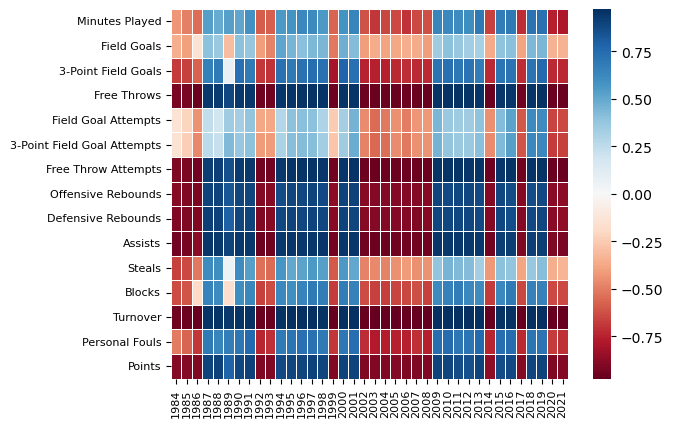

In [20]:
formated_header = ["Minutes Played", "Field Goals", "3-Point Field Goals",	"Free Throws", "Field Goal Attempts",
"3-Point Field Goal Attempts", "Free Throw Attempts", "Offensive Rebounds",	"Defensive Rebounds",
"Assists", "Steals", "Blocks", "Turnover", "Personal Fouls", "Points"]

pcares_fpath = dump_img / "pca_results"
pcares_fpath.mkdir(parents=True, exist_ok=True)

plot_df = pca_df[["season", "variable", "factor_1"]].pivot(index="variable", columns="season")
plot_df.columns = plot_df.columns.droplevel()
plot_df = plot_df.reset_index()

ax = sns.heatmap(
    plot_df.drop(columns=["variable"]), 
    yticklabels=formated_header,
    xticklabels=list(range(1984, 2022)),
    linewidth=0.5,
    cmap="RdBu",
)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
plt.xlabel("")
# plt.title("Factor Loading 1", fontsize=14)
plt.savefig(pcares_fpath / f"factor_one.png", dpi=300, bbox_inches="tight")
plt.show()


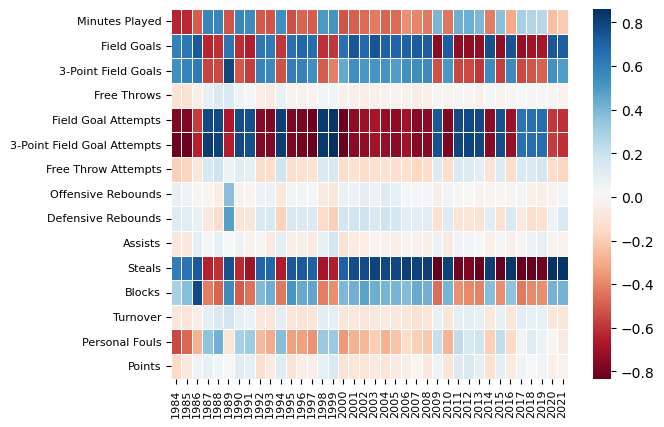

In [21]:
plot_df = pca_df[["season", "variable", "factor_2"]].pivot(index="variable", columns="season")
plot_df.columns = plot_df.columns.droplevel()
plot_df = plot_df.reset_index()

ax = sns.heatmap(
    plot_df.drop(columns=["variable"]), 
    yticklabels=formated_header,
    xticklabels=list(range(1984, 2022)),
    linewidth=0.5,
    cmap="RdBu",
)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
plt.xlabel("")
# plt.title("Factor Loading 2", fontsize=14)
plt.savefig(pcares_fpath / f"factor_two.png", dpi=300, bbox_inches="tight")
plt.show()

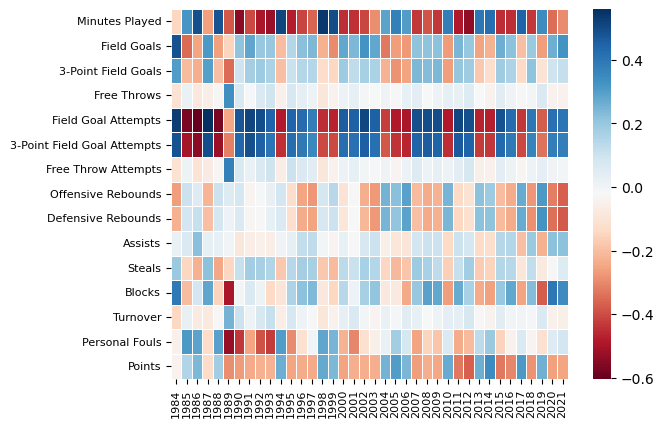

In [22]:
plot_df = pca_df[["season", "variable", "factor_3"]].pivot(index="variable", columns="season")
plot_df.columns = plot_df.columns.droplevel()
plot_df = plot_df.reset_index()

ax = sns.heatmap(
    plot_df.drop(columns=["variable"]), 
    yticklabels=formated_header,
    xticklabels=list(range(1984, 2022)),
    linewidth=0.5,
    cmap="RdBu",
)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
plt.xlabel("")
# plt.title("Factor Loading 2", fontsize=14)
plt.savefig(pcares_fpath / f"factor_three.png", dpi=300, bbox_inches="tight")
plt.show()